# Приоритизация гипотез и анализ A/B-теста интернет-магазина

## Приоритизация гипотез.

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

Файл /datasets/hypothesis.csv включает в себя следующие данные:

    Hypothesis — краткое описание гипотезы;
    Reach — охват пользователей по 10-балльной шкале;
    Impact — влияние на пользователей по 10-балльной шкале;
    Confidence — уверенность в гипотезе по 10-балльной шкале;
    Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts,тем дороже проверка гипотезы.
    
Наша задача приоритизировать имеющиеся гипотезы, используя два фреймворка: ICE и RICE. Это поможет определиться, с какой гипотезы из предложенных лучше всего начинать А/В тестирование.

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
display (hypothesis)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [3]:
hypothesis['Hypothesis'].to_list()

['Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей',
 'Запустить собственную службу доставки, что сократит срок доставки заказов',
 'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа',
 'Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар',
 'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей',
 'Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов',
 'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию',
 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок',
 'Запустить акцию, дающую скидку на товар в день рождения']

Применим фреймворк ICE для приоритизации гипотез.

In [4]:
hypothesis['ICE'] = (hypothesis['Impact'] * hypothesis['Confidence'])/hypothesis['Efforts']

print (hypothesis[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending = False))

                                          Hypothesis        ICE
8  Запустить акцию, дающую скидку на товар в день...  16.200000
0  Добавить два новых канала привлечения трафика,...  13.333333
7  Добавить форму подписки на все основные страни...  11.200000
6  Показать на главной странице баннеры с актуаль...   8.000000
2  Добавить блоки рекомендаций товаров на сайт ин...   7.000000
1  Запустить собственную службу доставки, что сок...   2.000000
5  Добавить страницу отзывов клиентов о магазине,...   1.333333
3  Изменить структура категорий, что увеличит кон...   1.125000
4  Изменить цвет фона главной страницы, чтобы уве...   1.000000


Согласно методу ICE самой приоритетной гипотезой для тестирования является запуск акции со скидкой на товар в день рождения, т.к. при среднем уровне затрат уровни Impact и Confidence высокие. Маркетологи высоко уверены, что такое улучшение сильно повлияет на поведение пользователей.

Применим фреймворк RICE для приоритизации гипотез.

In [5]:
hypothesis['RICE'] = (hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'])/hypothesis['Efforts']

print (hypothesis[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending = False))

                                          Hypothesis   RICE
7  Добавить форму подписки на все основные страни...  112.0
2  Добавить блоки рекомендаций товаров на сайт ин...   56.0
0  Добавить два новых канала привлечения трафика,...   40.0
6  Показать на главной странице баннеры с актуаль...   40.0
8  Запустить акцию, дающую скидку на товар в день...   16.2
3  Изменить структура категорий, что увеличит кон...    9.0
1  Запустить собственную службу доставки, что сок...    4.0
5  Добавить страницу отзывов клиентов о магазине,...    4.0
4  Изменить цвет фона главной страницы, чтобы уве...    3.0


При использовании метода RICE к гипотезе об акции в день рождения добавился низкое значение компонента Reach. Такое изменение затронет далеко не всех пользователей магазина. А вот гипотеза о добавлении формы подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок, заняла первое место, т.к. такое нововведение затронет всех пользователей, что означает максимальное значение параметра Reach при аналогично высоких параметрах Confidence и Efforts.  
А вот гипотеза о смене цвета фона главной страницы оказалась слабейшей с точки зрения обоих методов: высокие затраты и сомнительные результаты не дают нам поводов все бросать и менять цвет.

## Анализ A/B-теста

В нашем распоряжении два датасета с информацией о результатах А/В тестирования.  
Необходимо проанлизировать полученные результаты и сделать выводы для принятия решения по прошедшему тесту.

### Предобработка данных

Файл /datasets/orders.csv.

    transactionId — идентификатор заказа;
    visitorId — идентификатор пользователя, совершившего заказ;
    date — дата, когда был совершён заказ;
    revenue — выручка заказа;
    group — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv.

    date — дата;
    group — группа A/B-теста;
    visitors — количество пользователей в указанную дату в указанной группе A/B-теста

In [6]:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [7]:
orders.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [8]:
visitors.head(5)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [9]:
orders['group'].value_counts()

B    640
A    557
Name: group, dtype: int64

In [10]:
visitors.pivot_table(index='group', values='visitors', aggfunc='sum')

,visitors
group,
A,18736
B,18916


Ознакомившись с имеющимися таблицами, мы убедились, что трафик был разделен корректно: в группах А и В практически одинаковое число пользователей. Можем перейти непосредственно к анализу результатов тестирования.

In [11]:
orders['visitorId'].value_counts()

4256040402    11
2458001652    11
2378935119     9
2038680547     8
3717692402     5
              ..
3254689071     1
4186744110     1
1455861274     1
3612778094     1
3149228032     1
Name: visitorId, Length: 1031, dtype: int64

In [12]:
orders.query('visitorId == 4256040402')

,transactionId,visitorId,date,revenue,group
60,1421016313,4256040402,2019-08-16,56650,B
114,1120327437,4256040402,2019-08-01,5800,A
187,2048878902,4256040402,2019-08-17,1550,A
253,1610091760,4256040402,2019-08-23,16950,A
263,2575861846,4256040402,2019-08-18,10970,B
588,3700356838,4256040402,2019-08-20,17650,A
873,2519737434,4256040402,2019-08-08,58220,B
901,3402467119,4256040402,2019-08-27,1630,A
1018,1415970216,4256040402,2019-08-31,5170,A
1019,453824282,4256040402,2019-08-31,1850,B


Отдельно заметим, что один и тот же пользователь в разные визиты попал в разные группы. Это могло повлиять на чистоту эксперимента и необходимо предусмотреть заранее такие ситуации.  
На данном этапе мы не будем предпринимать никаких дополнительных действий с такими пользователями. Нам интересно посмотреть на результаты тестирования в таком виде, в каком они получились. В дальнейшем мы определим, относятя ли такие значения к аномальным и как они повлияли на исследование.

In [13]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [14]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Обратим внимание, что в двух таблицах есть столбцы, содержащие даты, однако, с форматом object. Исправим тип данных для дальнейшей корректной работы.

In [15]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'))

In [16]:
orders[orders.duplicated()]

,transactionId,visitorId,date,revenue,group


In [17]:
visitors[visitors.duplicated()]

,date,group,visitors


In [18]:
orders['revenue'].describe()

count    1.197000e+03
mean     8.348006e+03
std      3.919113e+04
min      5.000000e+01
25%      1.220000e+03
50%      2.978000e+03
75%      8.290000e+03
max      1.294500e+06
Name: revenue, dtype: float64

Ознакомившись со структурой таблиц, можно сказать, что нам повезло с датафреймами:пропуски отсутствуют, полные дублирующиеся строки не обнаружены. Отстутствуют отрицательные значения в данных с доходами. В качестве предобработки данных достаточно изменения типа данных, содержащих даты.

### Анализ кумулятивных метрик групп А и В в динамике

Построим график кумулятивной выручки по группам.

Соберём агрегированные кумулятивные по дням данные о заказах.

In [19]:
datesGroups = orders[['date','group']].drop_duplicates()

In [20]:
ordersAggregated = datesGroups.apply(
lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
    'date' : 'max',
    'group' : 'max',
    'transactionId' : pd.Series.nunique,
    'visitorId' : pd.Series.nunique,
    'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [21]:
ordersAggregated

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874
...,...,...,...,...,...
496,2019-08-29,B,596,544,5559398
730,2019-08-30,A,545,493,4022970
690,2019-08-30,B,620,567,5774631
958,2019-08-31,A,557,503,4084803


Аналогично получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина.

In [22]:
visitorsAggregated = datesGroups.apply(
lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [23]:
visitorsAggregated

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
...,...,...,...
496,2019-08-29,B,17708
730,2019-08-30,A,18037
690,2019-08-30,B,18198
958,2019-08-31,A,18736


In [24]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


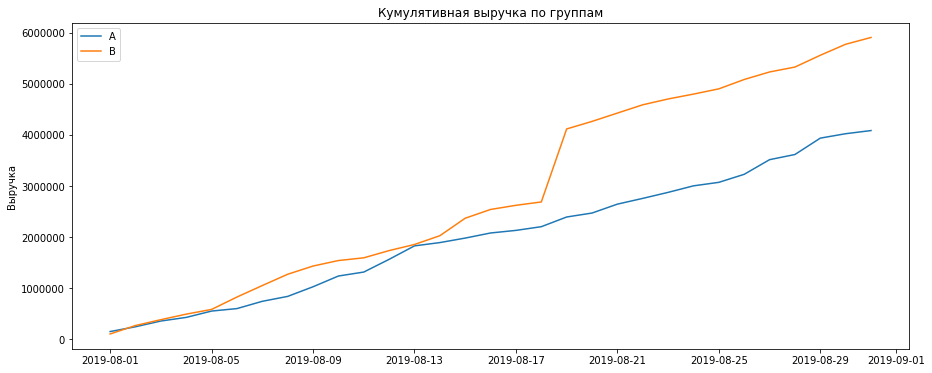

In [25]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize = (15,6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('Кумулятивная выручка по группам')
plt.ylabel('Выручка')
plt.legend();

Выручка обеих групп почти равномерно увеличивается в течение всего теста. Также можно заметить, что с 13 августа выручка группы В начала стабильно обгонять группу А. 
При этом у группы В в период между 17 и 21 августа наблюдается резкий рост. Это может быть связано либо с резким увеличением числа заказов, либо с появлением очень дорогого заказа, которые сместили среднее значение. 

Построим графики среднего чека по группам.

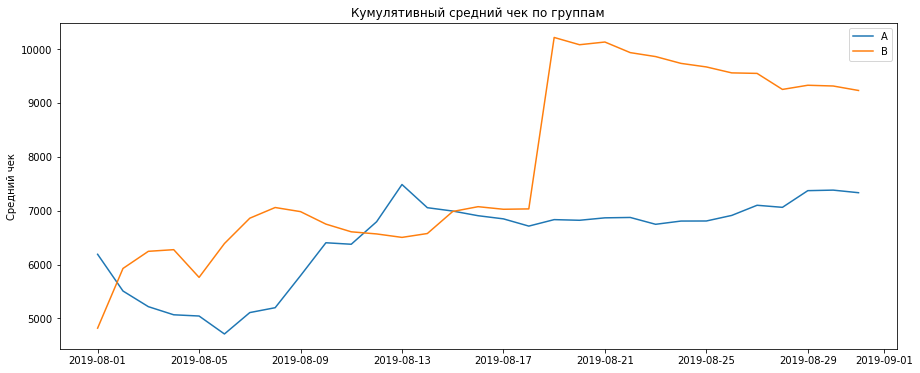

In [26]:
plt.figure(figsize = (15,6))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('Кумулятивный средний чек по группам')
plt.ylabel('Средний чек')
plt.legend();

Средний чек становится равномерным уже к концу теста. Чек группы В стал стабильно больше чека группы А после всплеска на графике после 17 августа. Скорее всего для группы В требуется чуть больше времени эксперимента для стабилизации и понимания реального значения среднего чека.

Построим график относительного различия для среднего чека. 

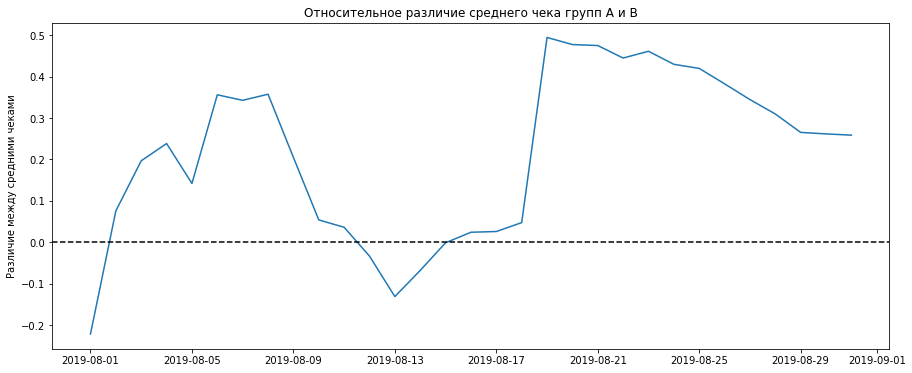

In [27]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize = (15,6))
plt.plot(mergedCumulativeRevenue['date'], (
    mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(
    mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Относительное различие среднего чека групп А и В')
plt.ylabel('Различие между средними чеками');

В нескольких точках график различия между средними чеками групп имеет резкие падения или наоборот всплески. Это означает, что в выборках присутствуют аномальные значения. При этом на протяжении всего эксперимента чаще всего график находится над осью х=0, что означает, что средний чек группы В в основном оказался больше среднего чека группы А.

Построим график кумулятивной конверсии по группам.

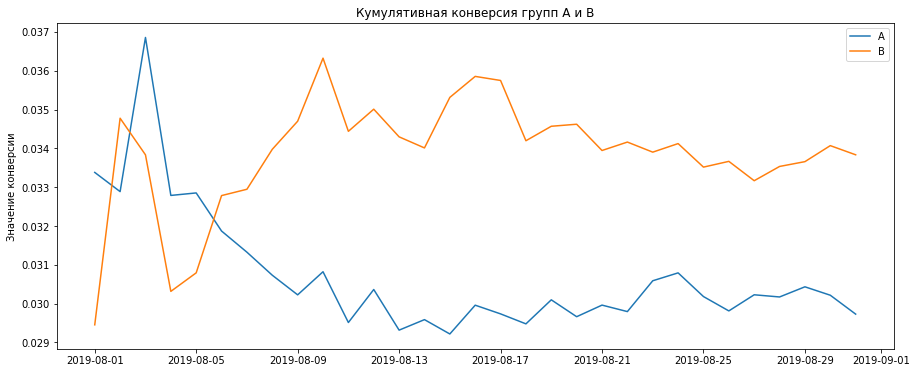

In [28]:
plt.figure(figsize = (15,6))
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title('Кумулятивная конверсия групп А и В')
plt.ylabel('Значение конверсии');

В начале эксперимента конверсии колебались, однако после 5 августа конверсия группы В превысила значение конверсии группы А, и тенденция сохранилась до конца эксперимента.

Построим график относительного изменения кумулятивной конверсии группы B к группе A.

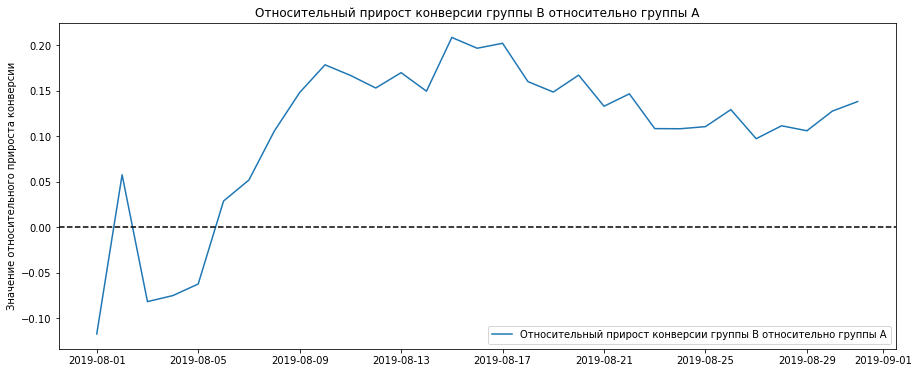

In [29]:
plt.figure(figsize = (15,6))

mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(
    cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(
    mergedCumulativeConversions['date'], 
    mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, 
    label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()
plt.title('Относительный прирост конверсии группы B относительно группы A')
plt.ylabel('Значение относительного прироста конверсии')
plt.axhline(y=0, color='black', linestyle='--');

В начале теста группа B проигрывала группе A, затем вырвалась вперёд. После 5 августа наблюдается рост конверсии группы В, но уже после 17 августа мы снова видим падение прироста конверсии и тенденция сохранилась до конца теста.

### Определение выбросов в стоимости заказов и количестве заказов

Построим точечный график количества заказов по пользователям.

In [30]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [31]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})

ordersByUsers.columns = ['userId','orders']

print(ordersByUsers.sort_values(by='orders',ascending=False).head(10))

          userId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


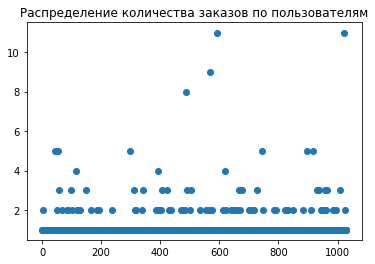

In [32]:
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Распределение количества заказов по пользователям');

Много пользователей более чем с двумя заказами. Есть отдельные выбросы с более 10ю заказами.
Посчитаем выборочные перцентили количества заказов на одного пользователя.

In [33]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


Не более 5% пользователей оформляли больше чем 2 заказа и не более 1% пользователей оформляли больше чем 4 заказа. Можем смело утверждать, что заказы более 2 в нашем случае являются выбросами.

Построим точечный график стоимостей заказов.

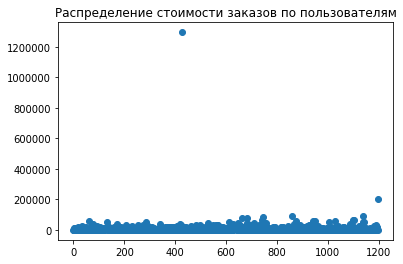

In [34]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('Распределение стоимости заказов по пользователям');

Посчитаем 95-й и 99-й перцентили стоимости заказов.

In [35]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


Не более 5% заказов дороже 28 000 рублей и не более 1% дороже 58 233 рублей. Будем считать, что стоимость заказа свыше 28000 для нас является аномальной.  

Скорее всего, именно эти выбросы мы и наблюдали в выбросах на графиках динамических изменений по различным показателям групп А и В. Необходимо проанализировать данные в первоначальном и очищенном виде, оценив статистическую значимость различия конверсий групп А и В.

### Оценка различия конверсий групп А и В по исходным данным

Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным.

В таблице visitorsADaily сохраним количество посетителей группы А за каждый день.

In [36]:
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']
visitorsADaily.head(5)

,date,visitorsPerDateA
0,2019-08-01,719
1,2019-08-02,619
2,2019-08-03,507
3,2019-08-04,717
4,2019-08-05,756


В таблице visitorsACummulative сохраним **накопленное** количество посетителей группы А за каждый день.

In [37]:
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]
    .agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']
visitorsACummulative.head(5)

,date,visitorsCummulativeA
0,2019-08-01,719
1,2019-08-02,1338
2,2019-08-03,1845
3,2019-08-04,2562
4,2019-08-05,3318


Создадим аналогичные таблицы для группы В.

In [38]:
visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]
    .agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

visitorsBCummulative.head(5)

,date,visitorsCummulativeB
31,2019-08-01,713
32,2019-08-02,1294
33,2019-08-03,1803
34,2019-08-04,2573
35,2019-08-05,3280


В таблице ordersADaily сохраним число заказов группы А по дням.

In [39]:
ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

В таблице ordersACummulative сохраним накопленное количество заказов группы А на каждый день.

In [40]:
ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

Создадим аналогичные таблицы по заказам группы В.

In [41]:
ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

Полученные таблицы объединим в датафрейм data.

In [42]:
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

print(data.head(5))

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              24           148579              21   
1 2019-08-02              20            93822              24   
2 2019-08-03              24           112473              16   
3 2019-08-04              16            70825              17   
4 2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  24               148579   
1           165531                  44               242401   
2           114248                  68               354874   
3           108571                  84               425699   
4            92428                 109               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  21               101217               719   
1                  45               266748               619   
2                  61               38

В таблице data содержится информация:

    date — дата;
    ordersPerDateA — количество заказов в выбранную дату в группе A;
    revenuePerDateA — суммарная выручка в выбранную дату в группе A;
    ordersPerDateB — количество заказов в выбранную дату в группе B;
    revenuePerDateB — суммарная выручка в выбранную дату в группе B;
    ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A;
    revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A;
    ordersCummulativeB — суммарное количество заказов до выбранной даты включительно в группе B;
    revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B;
    visitorsPerDateA — количество пользователей в выбранную дату в группе A;
    visitorsPerDateB — количество пользователей в выбранную дату в группе B;
    visitorsCummulativeA — количество пользователей до выбранной даты включительно в группе A;
    visitorsCummulativeB — количество пользователей до выбранной даты включительно в группе B.

Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. 

In [43]:
ordersByUsersA = orders[orders['group']=='A'].groupby(
    'visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby(
    'visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули.

In [44]:
sampleA = pd.concat(
    [ordersByUsersA['orders'],
     pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), 
               name='orders')],axis=0)

sampleB = pd.concat(
    [ordersByUsersB['orders'],
     pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), 
               name='orders')],axis=0)

Сформулируем гипотезы:

- Нулевая гипотеза H0: средние конверсии групп А и В не отличаются;

- Альтернативная гипотеза H1: средние конверсии групп А и В отличаются.

Используем критерий Манна-Уитни для проверки статистической значимости различия конверсий групп А и В.

In [45]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

0.008


Полученное p-value = 0.008 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем.

Выведем относительный прирост конверсии группы B: конверсия группы B / конверсия группы A - 1. Округлим до трёх знаков после запятой.

In [46]:
print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

0.138


При этом относительный выигрыш конверсии группы B равен 13.8%. 

### Оценка различия средних чеков групп А и В по исходным данным

Посчитайем статистическую значимость различий в среднем чеке заказа между группами по исходным данным.

Сформулируем гипотезы:

- Нулевая гипотеза H0: средние чеки групп А и В не отличаются;

- Альтернативная гипотеза H1: средние чеки групп А и В отличаются.

In [47]:
print("{0:.3f}".format(
    stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("{0:.3f}".format(
    orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.365
0.259


P-value значительно больше 0.05. Значит, нет оснований отвергать нулевую гипотезу и считать, что в среднем чеке есть различия. Средний чек группы B значительно выше среднего чека группы A на 25,9%.  

Есть основания предполагать, что такие результаты получились из-за присутствующих в выборке ранее выявленных выбросов. Поэтому необходимо провести статистическую проверки очищенных от выбросов данных.

### Оценка различия конверсий групп А и В по очищенным данным

Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным.

Примем за аномальных пользователей тех, кто совершил больше 2 заказов или совершил заказ дороже 28 000 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и 5% пользователей с дорогими заказами. 

Сделаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders и пользователей, совершивших заказы дороже 28 000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers. 

In [48]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 4]['userId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print(abnormalUsers.shape)

1099    148427295
18      199603092
928     204675465
23      237748145
684     358944393
dtype: int64
(68,)


Получили 68 аномальных пользователей.  
Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным.

В sampleAFiltered и sampleВFiltered сохраним данные пользователей, не относящихся к аномальным.

In [49]:
sampleAFiltered = pd.concat(
    [ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],
     pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),
               name='orders')],axis=0)

sampleBFiltered = pd.concat(
    [ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],
     pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),
               name='orders')],axis=0)

Сформулируем гипотезы:

- Нулевая гипотеза H0: средние конверсии очищенных групп А и В не отличаются;

- Альтернативная гипотеза H1: средние конверсии очищенных групп А и В отличаются.

Применим статистический критерий Манна-Уитни к полученным выборкам.

In [50]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.006
0.204


Новое значение p-value равно 0.006, что не очень отличается от аналогичного показателя для исходной выборки (0.008). Вывод не изменился: p-value меньше 0.05, отвергаем нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет.

Применим критерий Манна-Уитни к данным по среднему чеку очищенных выборок.

Сформулируем гипотезы:

- Нулевая гипотеза H0: средние чеки очищенных групп А и В не отличаются;

- Альтернативная гипотеза H1: средние чеки очищенных групп А и В отличаются.

In [51]:
print("{0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print("{0:.3f}".format(
    orders[np.logical_and(
        orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

0.394
-0.017


P-value по очищенным данным 0.394 больше p-value исходных данных (0.365) и значительно больше 0.05. Значит, у нас снова нет оснований отвергать нулевую гипотезу и считать, что в среднем чеке есть различия.

При этом средний чек очищенной группы В оказался на 1,7% ниже среднего чека очищенной группы А.

Итоги статистического анализа: 
1. Отвергли гипотезу о равенстве конверсий групп А и В.
2. Приняли гипотезу о равенстве средних чеков А и В.
3. Отвергли гипотезу о равенстве конверсий очищенных групп А и В.
4. Приняли гипотезу о равенстве средних чеков очищенных групп А и В.


Выбросы не повлияли на принятие гипотез по сравнению средних метрик наших групп. В то же время выбросы повлияли на вычисленные выигрыши конверсии и чека группы В: 
- по исходным данным конверсия группы В больше на 13,8%, по очищенным - на 20,4%;
- по исходным данным средний чек группы В больше на 25,9%, по очищенным меньше на 1,7%. 

Таким образом, при равных средних чеках конверсия группы В больше конверсии группы А.

# Общие выводы по результатам А/В тестирования

1. Нет статистически значимого различия по конверсии между группами ни по исходным, ни по данным после фильтрации выбросов;
2. Нет статистически значимого различия по среднему чеку между группами ни по исходным, ни по данным после фильтрации выбросов;
3. График различия конверсии между группами сообщает, что результаты группы B лучше группы A и наблюдается тенденция к росту конверсии;
4. График различия среднего чека говорит о том, что за период проведения эксперимента средний чек группы В хотя и превышал средний чек группы А. Однако, это скорее всего связано с аномальными заказами в группе В. Средний чек по очищенным данным группы В оказался на 1,7% ниже среднего чека группы А.
5. При не отличающихся средних чеках групп А и В конверсия группы В оказалась все-таки значимо больше конверсии группы А.


Таким образом, наше А/В тестирование можно считать успешным, так как даже при не изменившемся среднем чеке покупок мы получили конверсию больше, а значит, и итоговый доход тоже больше. Текущее тестирование можно остановить и переходить к следующим гипотезам.